In [0]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [31]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [34]:
train_labels = pd.read_csv('/content/train.csv')
train_labels.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [35]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (32,32))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


In [37]:
images[0]

array([[[ 47,  46,  50],
        [ 41,  40,  42],
        [ 43,  44,  42],
        ...,
        [ 16,  23,  18],
        [  4,  12,   5],
        [  8,  16,   9]],

       [[ 55,  54,  56],
        [ 53,  52,  54],
        [ 49,  49,  49],
        ...,
        [ 36,  43,  38],
        [ 20,  27,  22],
        [ 20,  27,  22]],

       [[ 59,  61,  62],
        [ 59,  61,  61],
        [ 62,  64,  64],
        ...,
        [ 50,  57,  54],
        [ 30,  37,  34],
        [ 27,  34,  31]],

       ...,

       [[133, 142, 128],
        [ 81,  89,  78],
        [ 45,  52,  45],
        ...,
        [ 43,  41,  30],
        [ 92,  91,  77],
        [133, 133, 114]],

       [[140, 150, 125],
        [ 99, 107,  88],
        [ 64,  69,  59],
        ...,
        [ 62,  54,  44],
        [107, 101,  86],
        [146, 140, 125]],

       [[133, 145, 118],
        [ 95, 104,  83],
        [ 62,  68,  57],
        ...,
        [ 66,  57,  47],
        [114, 107,  92],
        [153, 146, 131]]

In [38]:
images

[array([[[ 47,  46,  50],
         [ 41,  40,  42],
         [ 43,  44,  42],
         ...,
         [ 16,  23,  18],
         [  4,  12,   5],
         [  8,  16,   9]],
 
        [[ 55,  54,  56],
         [ 53,  52,  54],
         [ 49,  49,  49],
         ...,
         [ 36,  43,  38],
         [ 20,  27,  22],
         [ 20,  27,  22]],
 
        [[ 59,  61,  62],
         [ 59,  61,  61],
         [ 62,  64,  64],
         ...,
         [ 50,  57,  54],
         [ 30,  37,  34],
         [ 27,  34,  31]],
 
        ...,
 
        [[133, 142, 128],
         [ 81,  89,  78],
         [ 45,  52,  45],
         ...,
         [ 43,  41,  30],
         [ 92,  91,  77],
         [133, 133, 114]],
 
        [[140, 150, 125],
         [ 99, 107,  88],
         [ 64,  69,  59],
         ...,
         [ 62,  54,  44],
         [107, 101,  86],
         [146, 140, 125]],
 
        [[133, 145, 118],
         [ 95, 104,  83],
         [ 62,  68,  57],
         ...,
         [ 66,  57,  47],
  

In [39]:
type(images)

list

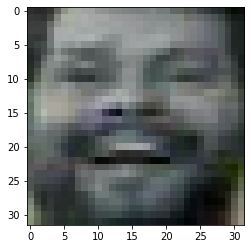

In [40]:
plt.imshow(images[0])

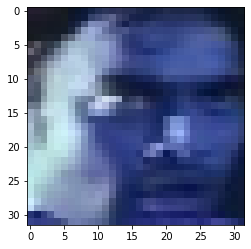

In [42]:
plt.imshow(images[1])

In [43]:
df_train.tail()

,ID,Class
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE
19905,9896.jpg,MIDDLE


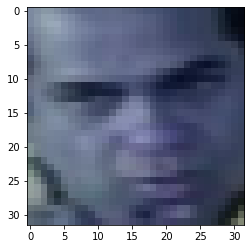

In [44]:
plt.imshow(images[-1])

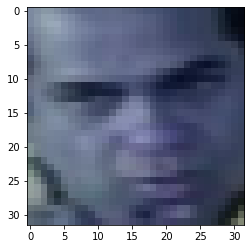

In [45]:
plt.imshow(images[19905])

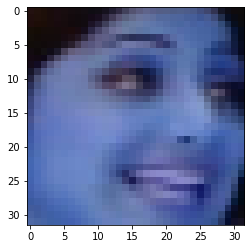

In [46]:
plt.imshow(images[19904])

In [0]:
images = np.array(images, dtype="float") / 255.0
labels = np.array(labels)

In [48]:
images[0]

array([[[0.18431373, 0.18039216, 0.19607843],
        [0.16078431, 0.15686275, 0.16470588],
        [0.16862745, 0.17254902, 0.16470588],
        ...,
        [0.0627451 , 0.09019608, 0.07058824],
        [0.01568627, 0.04705882, 0.01960784],
        [0.03137255, 0.0627451 , 0.03529412]],

       [[0.21568627, 0.21176471, 0.21960784],
        [0.20784314, 0.20392157, 0.21176471],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.14117647, 0.16862745, 0.14901961],
        [0.07843137, 0.10588235, 0.08627451],
        [0.07843137, 0.10588235, 0.08627451]],

       [[0.23137255, 0.23921569, 0.24313725],
        [0.23137255, 0.23921569, 0.23921569],
        [0.24313725, 0.25098039, 0.25098039],
        ...,
        [0.19607843, 0.22352941, 0.21176471],
        [0.11764706, 0.14509804, 0.13333333],
        [0.10588235, 0.13333333, 0.12156863]],

       ...,

       [[0.52156863, 0.55686275, 0.50196078],
        [0.31764706, 0.34901961, 0.30588235],
        [0.17647059, 0

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.25, random_state=42)

In [50]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(14929, 32, 32, 3)
<class 'numpy.ndarray'>
(14929,)
<class 'numpy.ndarray'>
(4977, 32, 32, 3)
<class 'numpy.ndarray'>
(4977,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [52]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(3, activation = "softmax"))

In [0]:
INIT_LR = 0.01 #0.01
EPOCHS = 2

opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [55]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Train on 14929 samples, validate on 4977 samples
Epoch 1/2
14929/14929 [==============================] - 144s 10ms/step - loss: 0.9491 - accuracy: 0.5440 - val_loss: 0.9201 - val_accuracy: 0.5443
Epoch 2/2
14929/14929 [==============================] - 144s 10ms/step - loss: 0.9119 - accuracy: 0.5700 - val_loss: 0.8838 - val_accuracy: 0.5971


In [56]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.58      0.93      0.72      2712
         OLD       0.00      0.00      0.00       586
       YOUNG       0.68      0.27      0.39      1679

    accuracy                           0.60      4977
   macro avg       0.42      0.40      0.37      4977
weighted avg       0.55      0.60      0.52      4977



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


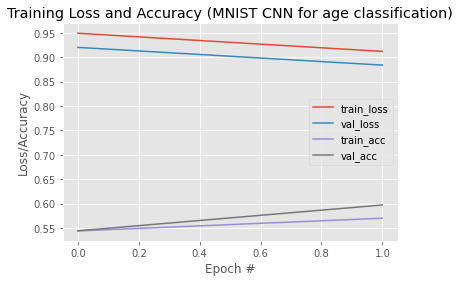

In [58]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()